In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
from IPython.display import clear_output


import sys
sys.path.append('../shared')

from bartolozziSPEED import *
# from CA_ALEX import *

In [2]:
def get_hurst_exponent(time_series, max_lag=20):
    """Returns the Hurst Exponent of the time series"""
    
    lags = range(2, max_lag)
    q_vals = np.linspace(1, 5, 50) 
    S_q = np.zeros(len(lags))
    reg = np.zeros(len(q_vals))
    for i, q_val in enumerate(q_vals):
        for j, lag in enumerate(lags):
            S_q[j] = np.mean(np.abs(time_series[lag:]-time_series[:-lag])**q_val)
         # calculate the slope of the log plot -> the Hurst Exponent
        reg[i] = np.polyfit(np.log10(lags), np.log10(S_q), 1)[0]

    return reg/q_vals, q_vals

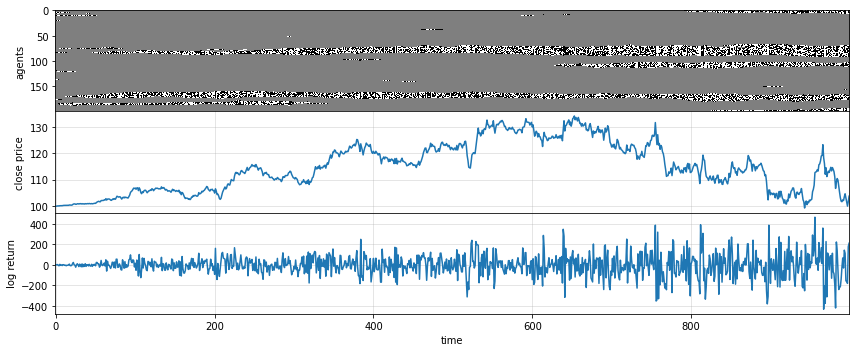

In [4]:
A_SPACE = np.linspace(1.8,2,1)
SIM = 1
plot = True

RVAR_STANDARD = np.zeros((len(A_SPACE), SIM))
RVAR = np.zeros((len(A_SPACE), SIM))
H = np.zeros((SIM, 50))

for j, A_val in enumerate(A_SPACE):
    for l in range(SIM):

        # Default
        # pd = 0.1
        # pe = 0.0001
        # ph = 0.1 
        # pa = 0.5
        # N0 = 2000
        # N1 = 200
        # A = 2
        # a = 0.1
        # h = 0.1
        
        A = 1.8 # interaction strength between agents
        a = 2*A # randomness of A 
        h = 0  # external field reflecting the effects of the environmnet

        pd = 0.05  # probability that an active trader diffuses and becomes inactive
        pe = 0.0001 # probability that a nontrading enters the market
        ph = 0.0493 # probability that an active trader can turn one of his inactive neighbors into an active one
        pa = 0.10 # active and inactive distribution 

        N0 = 1000# timepoints
        N1 = 200  # granulization of the grid / agents

        

        G, RVAR_ARRAY = generate(pd, pe, ph, pa, N0, N1, A, a, h)
        RVAR[j, l]= np.sum(RVAR_ARRAY**2)
        
        # PLOT

        if plot ==True:
            x = RVAR_ARRAY

            fig, (ax1, ax2, ax3) = plt.subplots(
                ncols=1, nrows=3, figsize=(12,5), sharex=True, gridspec_kw = {'wspace':0, 'hspace':0}
            )
            ax1.imshow(G.T, cmap="binary", interpolation="None", aspect="auto")

            r = (x - np.mean(x)) / np.std(x)
            s = 100
            S = np.zeros_like(x)
            S[0] = s
            for i in range(1,N0):
                S[i] = S[i-1] + (S[i-1] * r[i]/100) + 0.01


            ax1.set_ylabel("agents")
            ax2.plot(S)
            ax2.grid(alpha=0.4)
            ax2.set_ylabel("close price")
            ax3.grid(alpha=0.4)
            ax3.plot(x)
            ax3.set_ylabel("log return")
            ax3.set_xlabel("time")
            plt.tight_layout()
            plt.show()

        x = RVAR_ARRAY

        r = (x - np.mean(x)) / np.std(x)

        s = 1400
        S = np.zeros_like(x)
        S[0] = s
        for i in range(1, N0):
             S[i] = S[i-1] + (S[i-1] * r[i]/100)

        _H_, Q = get_hurst_exponent(S, 100)
        H[l,:] = _H_
        # plt.plot(Q,_H_*Q, ".")
    # H_MEAN = np.mean(H,axis=0)
    # H_STD = np.std(H, axis=0)
    # clear_output(wait=True)
    # print(f"SIM{l}")


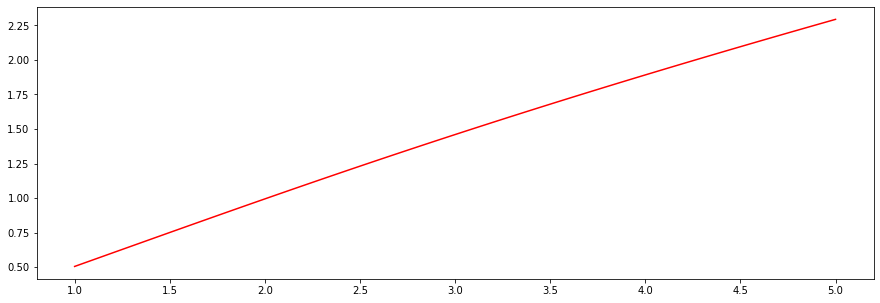

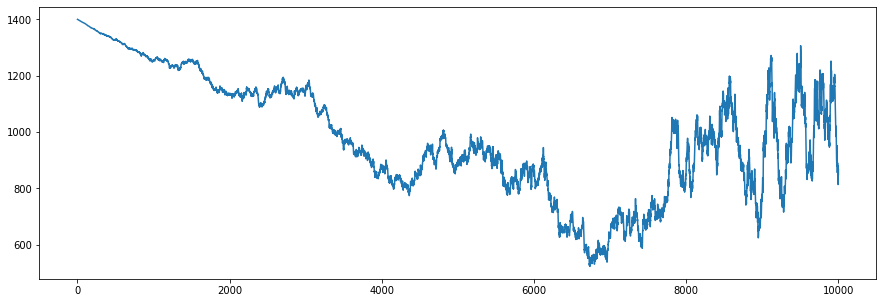

In [15]:
H_MEAN = np.mean(H,axis=0)
H_STD = np.std(H, axis=0)



Y1 = H_MEAN*Q+1.96*(H_STD)/np.sqrt(SIM)*H_MEAN*Q
Y2 = H_MEAN*Q-1.96*(H_STD)/np.sqrt(SIM)*H_MEAN*Q

plt.figure(figsize=(15,5))
plt.plot(Q, Q*H_MEAN, color="r")
plt.fill_between(x=Q, y1 =Y1, y2=Y2, alpha=0.4)
plt.show()

plt.figure(figsize=(15,5))
plt.plot(S)
plt.show()

<ipython-input-16-4f8392230e57>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spx["Date"] = pd.to_datetime(df_spx["Date"], format='%d/%m/%Y')


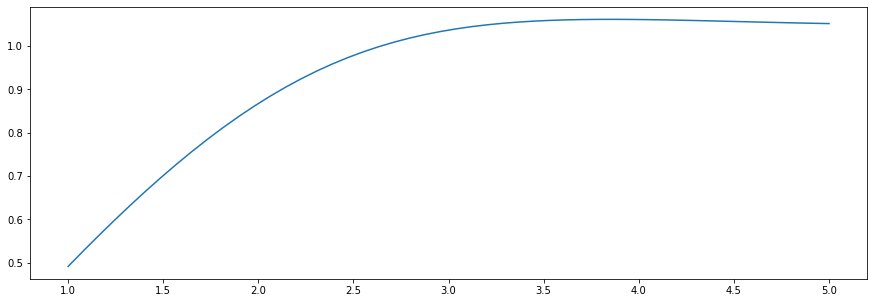

In [16]:
df = pd.read_csv("/Users/aleksander/Library/Mobile Documents/com~apple~CloudDocs/VSCODE/ComplexSystems/data/all_world_indices_clean.csv")


df_spx = df[["Date", "SPX Index"]]
df_spx["Date"] = pd.to_datetime(df_spx["Date"], format='%d/%m/%Y')
df_spx = df_spx.sort_values(by="Date")
df_spx.reset_index(inplace=True)
series_array = np.array(df_spx["SPX Index"])


H, Q = get_hurst_exponent(series_array, 100)

plt.figure(figsize=(15,5))
plt.plot(Q,H*Q)

In [20]:
x =RVAR_ARRAY

r = (x - np.mean(x)) / np.std(x)

s = 1400
S = np.zeros_like(x)
S[0] = s
for i in range(1, N0):
    S[i] = S[i-1] + (S[i-1] * r[i]/100)
for lag in [20, 100, 300, 500]:
    hurst_exp = get_hurst_exponent(S, lag)
    print(f"Hurst exponent with {lag} lags: {hurst_exp:.4f}")

TypeError: unsupported format string passed to numpy.ndarray.__format__

In [11]:
x =RVAR_ARRAY

r = (x - np.mean(x)) / np.std(x)

s = 1400
S = np.zeros_like(x)
S[0] = s
for i in range(1, N0):
    S[i] = S[i-1] + (S[i-1] * r[i]/100)

q_vals = np.linspace(1, 5, 30)
h_res = np.zeros(q_vals.shape[0])

for i, val in enumerate(q_vals):
    h_res[i] = genhurst(S, val)

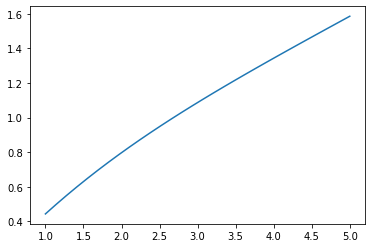

In [5]:
plt.plot(q_vals, q_vals*h_res)

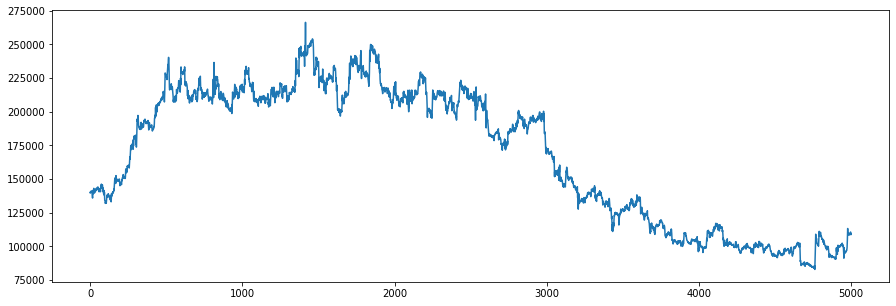

In [45]:
plt.figure(figsize=(15,5))
plt.plot(S)

# A PARAMETER

<ipython-input-7-a64e1e42d92f>:3: RuntimeWarning: invalid value encountered in true_divide
  RVAR_STD= RVAR_STD/np.max(RVAR_STD)


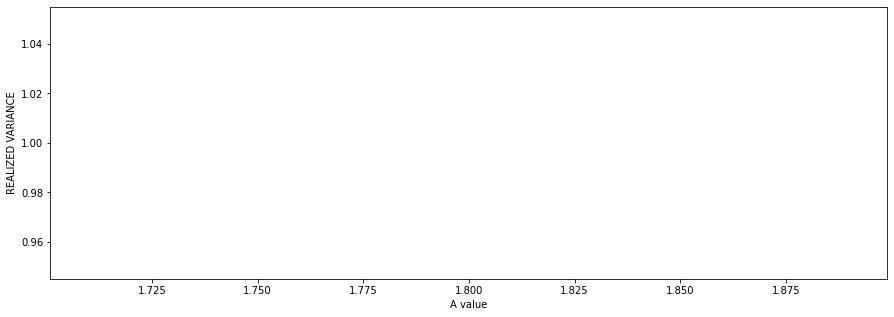

In [7]:
RVAR_MEAN = np.mean(RVAR, axis=1)
RVAR_STD = np.std(RVAR, axis=1)
RVAR_STD= RVAR_STD/np.max(RVAR_STD)

Y1 = RVAR_MEAN/np.max(RVAR_MEAN)+1.96*(RVAR_STD)/np.sqrt(SIM)
Y2 = RVAR_MEAN/np.max(RVAR_MEAN)-1.96*(RVAR_STD)/np.sqrt(SIM)

plt.figure(figsize=(15,5))
plt.plot(A_SPACE, RVAR_MEAN/np.max(RVAR_MEAN), color="r")
plt.fill_between(x=A_SPACE, y1 =Y1, y2=Y2)
plt.xlabel("A value")
plt.ylabel("REALIZED VARIANCE")
plt.show()

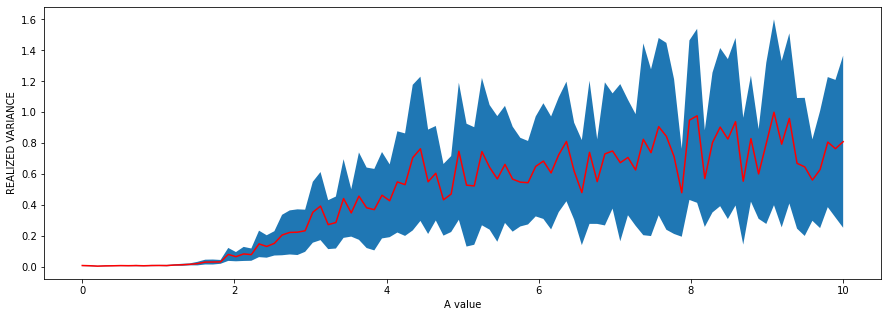

In [50]:
RVAR2 = np.load("CA_100sim_2000N0_Arange(0,10,100).npy")
RVAR_MEAN2 = np.mean(RVAR2, axis=1)
RVAR_STD2 = np.std(RVAR2, axis=1)
RVAR_STD2= RVAR_STD2/np.max(RVAR_STD2)

Y1 = RVAR_MEAN2/np.max(RVAR_MEAN2)+1.96*(RVAR_STD2)/np.sqrt(100)
Y2 = RVAR_MEAN2/np.max(RVAR_MEAN2)-1.96*(RVAR_STD2)/np.sqrt(100)

plt.figure(figsize=(15,5))
plt.plot(A_SPACE, RVAR_MEAN2/np.max(RVAR_MEAN2), color="r")
plt.fill_between(x=A_SPACE, y1 =Y1, y2=Y2)
plt.xlabel("A value")
plt.ylabel("REALIZED VARIANCE")
plt.show()

In [31]:
RVAR_STD/np.max(RVAR_STD)

array([0.00584158, 0.00571303, 0.00320149, 0.00475359, 0.00417657,
       0.00584396, 0.00538863, 0.00661943, 0.00578196, 0.00642858,
       0.00609171, 0.00706218, 0.00741085, 0.01042487, 0.01015188,
       0.01844671, 0.02486581, 0.02588914, 0.02000337, 0.06757933,
       0.04816633, 0.07328812, 0.06414542, 0.13790712, 0.11692119,
       0.12678924, 0.21085994, 0.22974711, 0.23818516, 0.21968952,
       0.31755251, 0.35496538, 0.25512716, 0.2709177 , 0.41021272,
       0.24710349, 0.45537897, 0.41953565, 0.4248095 , 0.45056887,
       0.379586  , 0.52787195, 0.53438624, 0.75921353, 0.7520063 ,
       0.5441365 , 0.49256193, 0.37358759, 0.39587307, 0.714683  ,
       0.64042273, 0.61286482, 0.76827041, 0.64980614, 0.65493378,
       0.61037828, 0.54755907, 0.46207664, 0.43516167, 0.52105354,
       0.60309771, 0.58886381, 0.59832863, 0.62348787, 0.505319  ,
       0.54770249, 0.74609431, 0.44077808, 0.74589048, 0.6005528 ,
       0.81958165, 0.60248676, 0.58210863, 1.        , 0.86949